In [39]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, KBinsDiscretizer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score,silhouette_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
import pickle
import warnings
warnings.filterwarnings('ignore')


## Load Dataset

In [2]:
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

## Data Exploration

In [3]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [4]:
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
df.shape

(7043, 21)

## Plotting

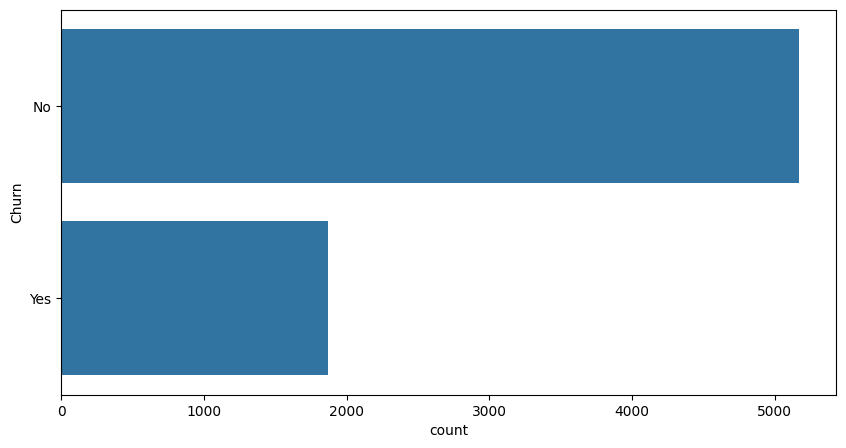

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['Churn'])
plt.show()

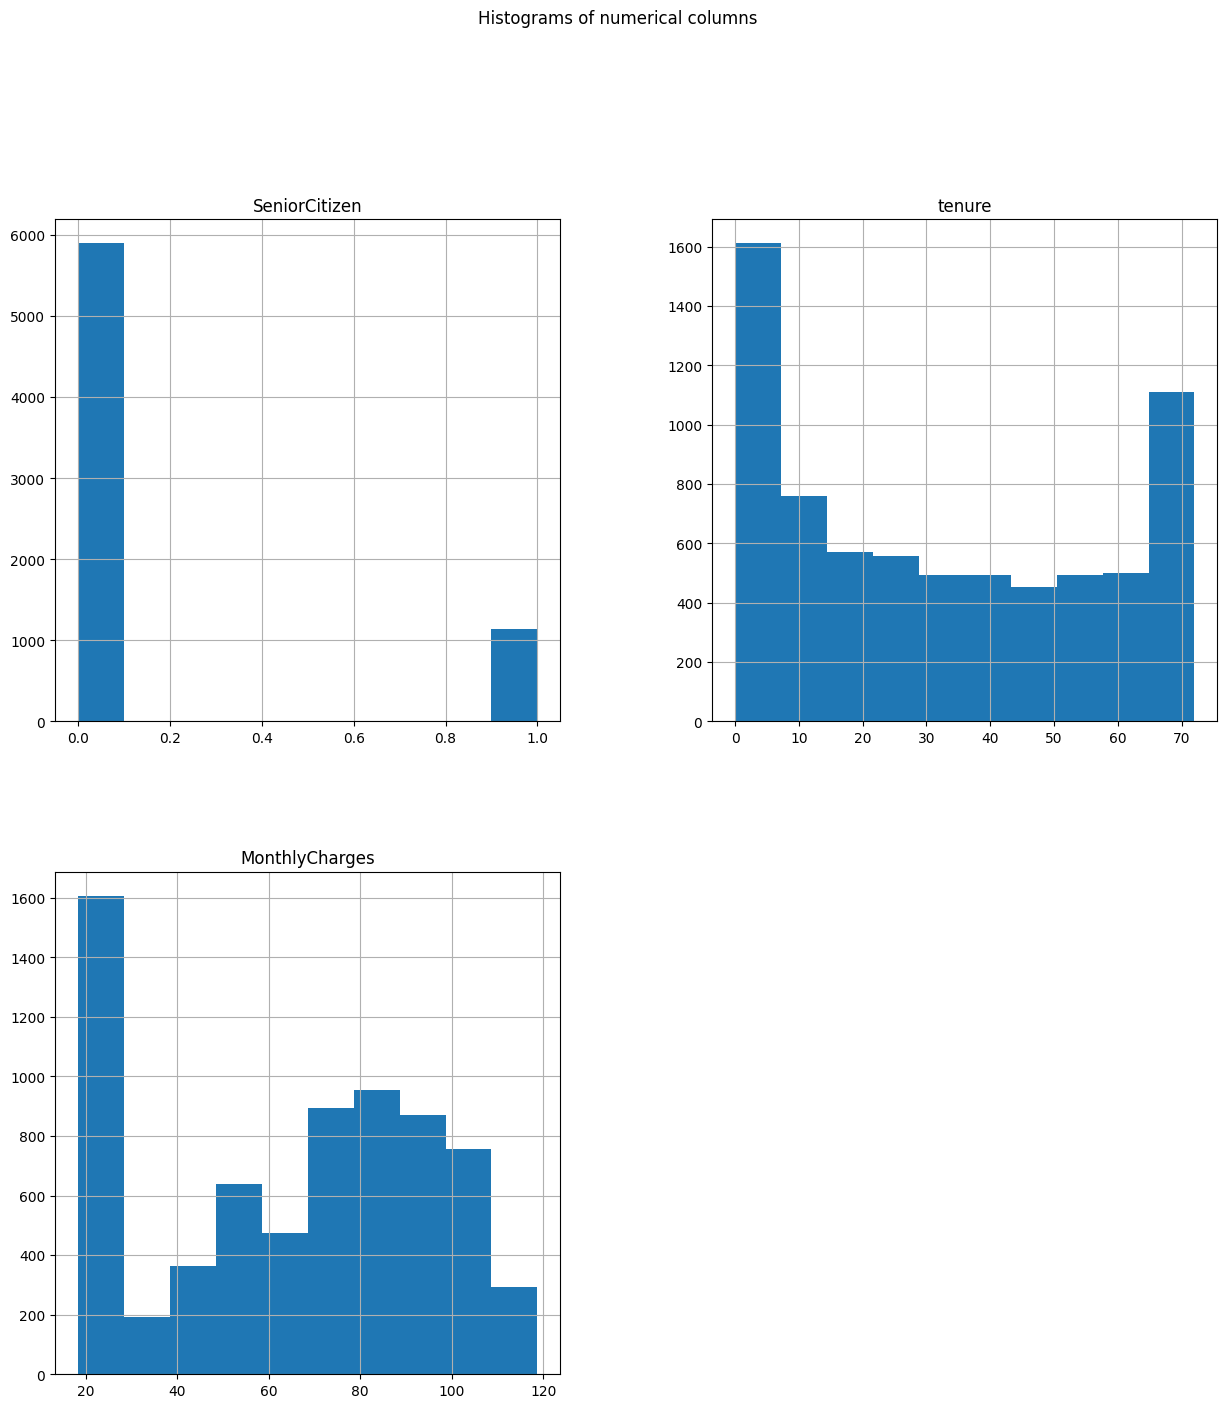

In [14]:
df.drop(['Churn'], axis=1).hist(figsize=(15,15))
plt.suptitle('Histograms of numerical columns', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

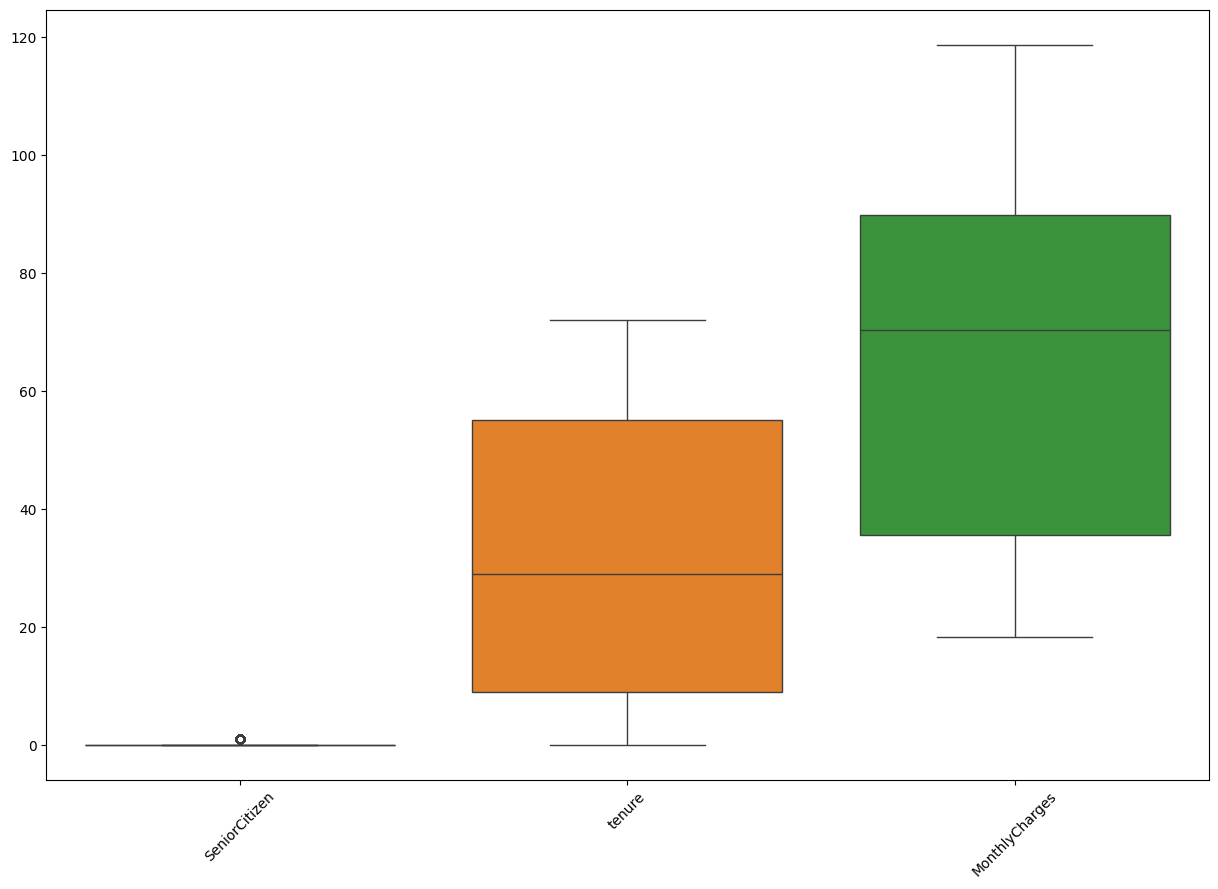

In [15]:
# boxplot of numerical columns
plt.figure(figsize=(15,10))
sns.boxplot(data=df.drop(['Churn'], axis=1))
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

### Remove unnecessary columns

In [16]:
df.drop(['customerID'], axis=1, inplace=True)

### Change data type

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [19]:
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Encode the columns
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [23]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
X = df

### develop model

### Build pipeline

In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

In [29]:
params_grid = {
    'kmeans__n_clusters': range(2, 11),  # Testing different number of clusters
    'kmeans__init': ['k-means++', 'random'],  # Different initialization methods
    'kmeans__n_init': [10, 20],  # Number of time the k-means algorithm will be run
}

In [31]:
grid_search = GridSearchCV(pipeline, params_grid, cv=5,
                           n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X, None)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/anaskanafani/Desktop/ml/customer-churn/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaskanafani/Desktop/ml/customer-churn/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/anaskanafani/Desktop/ml/customer-churn/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaskanafani/Desktop/ml/customer-churn/env/lib/python3.12/site-packages/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kmeans', KMeans(random_state=42))]),
             n_jobs=-1,
             param_grid={'kmeans__init': ['k-means++', 'random'],
                         'kmeans__n_clusters': range(2, 11),
                         'kmeans__n_init': [10, 20]},
             scoring='accuracy', verbose=1)

### Get the best model

In [32]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

Best parameters: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 2, 'kmeans__n_init': 10}


In [34]:
df['Cluster'] = best_model.named_steps['kmeans'].labels_

In [37]:
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4711301234278248


In [40]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
df['PC1'] = principalComponents[:, 0]
df['PC2'] = principalComponents[:, 1]

### Visualize model performance

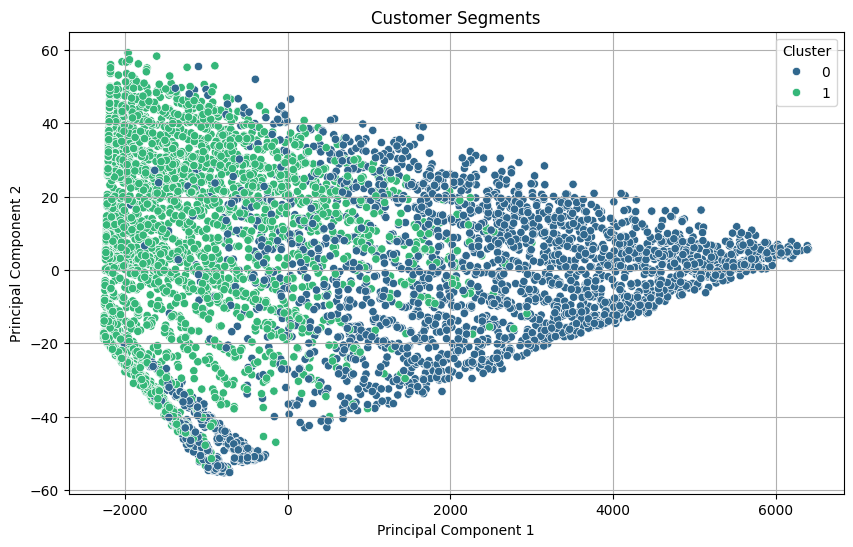

In [42]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [44]:
## Step 8: Analyzing the Clusters
for i in range(best_params['kmeans__n_clusters']):
    print(f'\nCluster {i} analysis:')
    cluster = df[df['Cluster'] == i]
    print(cluster.describe())


Cluster 0 analysis:
            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  2882.000000    2882.000000  2882.000000  2882.000000  2882.000000   
mean      0.498959       0.165163     0.725885     0.416378    55.862942   
std       0.500086       0.371392     0.446145     0.493043    14.803431   
min       0.000000       0.000000     0.000000     0.000000     6.000000   
25%       0.000000       0.000000     0.000000     0.000000    46.000000   
50%       0.000000       0.000000     1.000000     0.000000    60.000000   
75%       1.000000       0.000000     1.000000     1.000000    69.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   2882.000000    2882.000000      2882.000000     2882.000000   
mean       0.920194       1.354615         0.816447        1.107911   
std        0.271039       0.891470         0.698563        0.905351   
min       

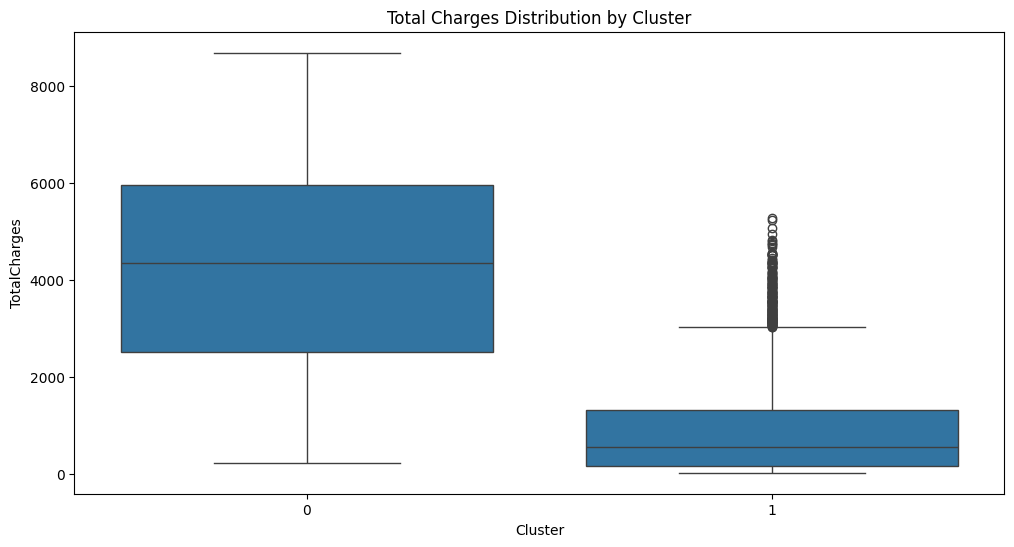

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='TotalCharges', data=df)
plt.title('Total Charges Distribution by Cluster')
plt.show()

## Model Conversion

In [ ]:
pickle_out = open("classifier.pkl","wb")
pickle.dump(best_pipeline, pickle_out)
pickle_out.close()

In [ ]:
best_pipeline.predict([[
    1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0
]])

In [ ]:
X.info()